characters 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ
img <PIL.Image.Image image mode=RGB size=40x60 at 0x11AD08198>


Text(0.5,1,'H')

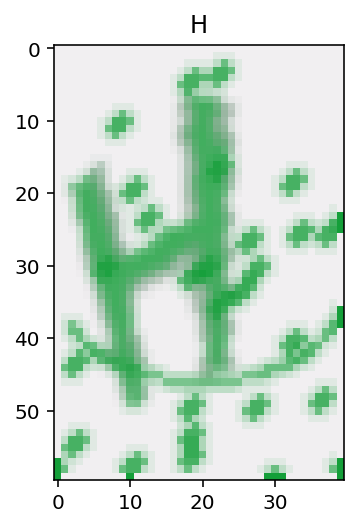

In [40]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits + string.ascii_uppercase
print('characters', characters)

width, height, n_len, n_class = 40, 60, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_char = random.choice(characters)
img = generator.generate_image(random_char)

print('img', img)
plt.imshow(img)
plt.title(random_char)